# **1. Import library:**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder,OneHotEncoder, OrdinalEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression, SGDRegressor, Lasso, Ridge, ElasticNet
from sklearn.metrics import mean_squared_error

---

# **2. Read data:**

In [2]:
df1 = pd.read_csv('laptop_price.csv', encoding='ISO-8859-1')
df2 = pd.read_csv('laptop_prices.csv', encoding='ISO-8859-1')

In [3]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


In [4]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Company               1275 non-null   object 
 1   Product               1275 non-null   object 
 2   TypeName              1275 non-null   object 
 3   Inches                1275 non-null   float64
 4   Ram                   1275 non-null   int64  
 5   OS                    1275 non-null   object 
 6   Weight                1275 non-null   float64
 7   Price_euros           1275 non-null   float64
 8   Screen                1275 non-null   object 
 9   ScreenW               1275 non-null   int64  
 10  ScreenH               1275 non-null   int64  
 11  Touchscreen           1275 non-null   object 
 12  IPSpanel              1275 non-null   object 
 13  RetinaDisplay         1275 non-null   object 
 14  CPU_company           1275 non-null   object 
 15  CPU_freq             

# **2.1 Merge data**


**Kiểm tra xem có các thuộc tính df1 có mà df2 không **trùng****

In [5]:

columns_list = df2.columns.tolist()
print("df1:")
for t in df1.columns:
    if(t not in columns_list):
        print(t)    

df1:
laptop_ID
ScreenResolution
Cpu
Memory
Gpu
OpSys


**Đếm các hàng giống nhau**

In [6]:
import pandas as pd

# Giả sử df1 và df2 đã được định nghĩa trước
# Tìm các cột chung giữa df1 và df2
common_columns = df1.columns.intersection(df2.columns)

# Loại bỏ cột 'price' nếu nó có trong các cột chung
columns_to_compare = common_columns.drop('Ram') 
columns_to_compare = columns_to_compare.drop('Weight') 
# Lọc df1 và df2 chỉ với các cột cần so sánh
df1_common = df1[columns_to_compare]
df2_common = df2[columns_to_compare]


# Hoặc sử dụng phương thức unique
matching_rows = pd.merge(df1_common, df2_common, how='inner').drop_duplicates()

# Hiển thị kết quả
print("Các hàng giống nhau :")
print(len(matching_rows))


Các hàng giống nhau :
1258


**Vì thấy có hầu như dữ liệu là trùng lặp => chọn df2( nhiều thuộc tính hơn df1) làm dataset**

In [7]:
df=df2

---

# **3. Check data:**

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Company               1275 non-null   object 
 1   Product               1275 non-null   object 
 2   TypeName              1275 non-null   object 
 3   Inches                1275 non-null   float64
 4   Ram                   1275 non-null   int64  
 5   OS                    1275 non-null   object 
 6   Weight                1275 non-null   float64
 7   Price_euros           1275 non-null   float64
 8   Screen                1275 non-null   object 
 9   ScreenW               1275 non-null   int64  
 10  ScreenH               1275 non-null   int64  
 11  Touchscreen           1275 non-null   object 
 12  IPSpanel              1275 non-null   object 
 13  RetinaDisplay         1275 non-null   object 
 14  CPU_company           1275 non-null   object 
 15  CPU_freq             

In [9]:
df.isna().sum()

Company                 0
Product                 0
TypeName                0
Inches                  0
Ram                     0
OS                      0
Weight                  0
Price_euros             0
Screen                  0
ScreenW                 0
ScreenH                 0
Touchscreen             0
IPSpanel                0
RetinaDisplay           0
CPU_company             0
CPU_freq                0
CPU_model               0
PrimaryStorage          0
SecondaryStorage        0
PrimaryStorageType      0
SecondaryStorageType    0
GPU_company             0
GPU_model               0
dtype: int64

In [10]:
print(f'duplicated values: {df.duplicated().sum().item()}')

duplicated values: 0


In [11]:
df.describe(include='all')

,Company,Product,TypeName,Inches,Ram,OS,Weight,Price_euros,Screen,ScreenW,...,RetinaDisplay,CPU_company,CPU_freq,CPU_model,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company,GPU_model
count,1275,1275,1275,1275.000000,1275.000000,1275,1275.000000,1275.000000,1275,1275.000000,...,1275,1275,1275.000000,1275,1275.000000,1275.000000,1275,1275,1275,1275
unique,19,618,6,NaN,NaN,9,NaN,NaN,4,NaN,...,2,3,NaN,93,NaN,NaN,4,4,4,110
top,Dell,XPS 13,Notebook,NaN,NaN,Windows 10,NaN,NaN,Full HD,NaN,...,No,Intel,NaN,Core i5 7200U,NaN,NaN,SSD,No,Intel,HD Graphics 620
freq,291,30,707,NaN,NaN,1048,NaN,NaN,835,NaN,...,1258,1214,NaN,193,NaN,NaN,837,1067,704,279
mean,NaN,NaN,NaN,15.022902,8.440784,NaN,2.040525,1134.969059,NaN,1900.043922,...,NaN,NaN,2.302980,NaN,444.517647,176.069020,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,1.429470,5.097809,NaN,0.669196,700.752504,NaN,493.346186,...,NaN,NaN,0.503846,NaN,365.537726,415.960655,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,10.100000,2.000000,NaN,0.690000,174.000000,NaN,1366.000000,...,NaN,NaN,0.900000,NaN,8.000000,0.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,14.000000,4.000000,NaN,1.500000,609.000000,NaN,1920.000000,...,NaN,NaN,2.000000,NaN,256.000000,0.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,15.600000,8.000000,NaN,2.040000,989.000000,NaN,1920.000000,...,NaN,NaN,2.500000,NaN,256.000000,0.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,15.600000,8.000000,NaN,2.310000,1496.500000,NaN,1920.000000,...,NaN,NaN,2.700000,NaN,512.000000,0.000000,NaN,NaN,NaN,NaN


---

# **4. Edit data:**

In [12]:
df.head(5)

,Company,Product,TypeName,Inches,Ram,OS,Weight,Price_euros,Screen,ScreenW,...,RetinaDisplay,CPU_company,CPU_freq,CPU_model,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company,GPU_model
0,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1339.69,Standard,2560,...,Yes,Intel,2.3,Core i5,128,0,SSD,No,Intel,Iris Plus Graphics 640
1,Apple,Macbook Air,Ultrabook,13.3,8,macOS,1.34,898.94,Standard,1440,...,No,Intel,1.8,Core i5,128,0,Flash Storage,No,Intel,HD Graphics 6000
2,HP,250 G6,Notebook,15.6,8,No OS,1.86,575.00,Full HD,1920,...,No,Intel,2.5,Core i5 7200U,256,0,SSD,No,Intel,HD Graphics 620
3,Apple,MacBook Pro,Ultrabook,15.4,16,macOS,1.83,2537.45,Standard,2880,...,Yes,Intel,2.7,Core i7,512,0,SSD,No,AMD,Radeon Pro 455
4,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1803.60,Standard,2560,...,Yes,Intel,3.1,Core i5,256,0,SSD,No,Intel,Iris Plus Graphics 650


Xem thuộc tính OS có cái nào của Apple mà không phải MacOS không ?

In [13]:
dem=0
for index, row in df.iterrows():
    if row['Product'] == "Apple" and row['OS'] != "MacOS":
        dem+=1
print("Số sản phẩm của Apple mà không phải hệ điều hành OS là : " ,dem)

Số sản phẩm của Apple mà không phải hệ điều hành OS là :  0


**=> Bỏ**

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Company               1275 non-null   object 
 1   Product               1275 non-null   object 
 2   TypeName              1275 non-null   object 
 3   Inches                1275 non-null   float64
 4   Ram                   1275 non-null   int64  
 5   OS                    1275 non-null   object 
 6   Weight                1275 non-null   float64
 7   Price_euros           1275 non-null   float64
 8   Screen                1275 non-null   object 
 9   ScreenW               1275 non-null   int64  
 10  ScreenH               1275 non-null   int64  
 11  Touchscreen           1275 non-null   object 
 12  IPSpanel              1275 non-null   object 
 13  RetinaDisplay         1275 non-null   object 
 14  CPU_company           1275 non-null   object 
 15  CPU_freq             

**Details of the columns:**
1. `Company`: Laptop manufacturer.

2. `Product`: Brand and Model.

3. `TypeName`: Type (Notebook, Ultrabook, Gaming, etc.).

4. `Inches`: Screen Size.

5. `RAM`: Laptop RAM.

6. `OS`: Operating System. 

7. `Weight`: Laptop Weight (kg).

8. `Screen`: Screen Resolution.

9. `ScreenW`: Screen's Width.

10. `ScreenH`: Screen's Height.

11. `Touchscreen`: If laptop has touch Screen.

12. `IPSpanel`: If laptop has IPS screen.

13. `RetinaDisplay`: If laptop has Retinal screen. 

14. `CPU_company`: Central Processing Unit (CPU) manufacturer.

15. `CPU_freq`: Central Processing Unit (CPU) Frequency (GHz).

16. `CPU_model`: Central Processing Unit (CPU) .

17. `PrimaryStorage`: Primary Storage.

18. `SecondaryStorage`:  Secondary Storage.

19. `PrimaryStorageType`:  Primary Storage Type

20. `SecondaryStorageType`:  Secondary Storage Type 

21. `GPU_Company`: Graphics Processing Units (GPU) manufacturer.

22. `GPU_Type`: Graphics Processing Units (GPU) type.

23. `Price_euros`: Laptop price (Euro).

---

# **5.Check new data:**

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Company               1275 non-null   object 
 1   Product               1275 non-null   object 
 2   TypeName              1275 non-null   object 
 3   Inches                1275 non-null   float64
 4   Ram                   1275 non-null   int64  
 5   OS                    1275 non-null   object 
 6   Weight                1275 non-null   float64
 7   Price_euros           1275 non-null   float64
 8   Screen                1275 non-null   object 
 9   ScreenW               1275 non-null   int64  
 10  ScreenH               1275 non-null   int64  
 11  Touchscreen           1275 non-null   object 
 12  IPSpanel              1275 non-null   object 
 13  RetinaDisplay         1275 non-null   object 
 14  CPU_company           1275 non-null   object 
 15  CPU_freq             

In [16]:
df.isnull().sum()

Company                 0
Product                 0
TypeName                0
Inches                  0
Ram                     0
OS                      0
Weight                  0
Price_euros             0
Screen                  0
ScreenW                 0
ScreenH                 0
Touchscreen             0
IPSpanel                0
RetinaDisplay           0
CPU_company             0
CPU_freq                0
CPU_model               0
PrimaryStorage          0
SecondaryStorage        0
PrimaryStorageType      0
SecondaryStorageType    0
GPU_company             0
GPU_model               0
dtype: int64

In [17]:
print(f'duplicated values: {df.duplicated().sum().item()}')

duplicated values: 0


In [18]:
duplicates = df[df.duplicated(keep=False)]
duplicates

,Company,Product,TypeName,Inches,Ram,OS,Weight,Price_euros,Screen,ScreenW,...,RetinaDisplay,CPU_company,CPU_freq,CPU_model,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company,GPU_model


In [19]:
df = df.drop_duplicates()
df

,Company,Product,TypeName,Inches,Ram,OS,Weight,Price_euros,Screen,ScreenW,...,RetinaDisplay,CPU_company,CPU_freq,CPU_model,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company,GPU_model
0,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1339.69,Standard,2560,...,Yes,Intel,2.3,Core i5,128,0,SSD,No,Intel,Iris Plus Graphics 640
1,Apple,Macbook Air,Ultrabook,13.3,8,macOS,1.34,898.94,Standard,1440,...,No,Intel,1.8,Core i5,128,0,Flash Storage,No,Intel,HD Graphics 6000
2,HP,250 G6,Notebook,15.6,8,No OS,1.86,575.00,Full HD,1920,...,No,Intel,2.5,Core i5 7200U,256,0,SSD,No,Intel,HD Graphics 620
3,Apple,MacBook Pro,Ultrabook,15.4,16,macOS,1.83,2537.45,Standard,2880,...,Yes,Intel,2.7,Core i7,512,0,SSD,No,AMD,Radeon Pro 455
4,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1803.60,Standard,2560,...,Yes,Intel,3.1,Core i5,256,0,SSD,No,Intel,Iris Plus Graphics 650
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1270,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,4,Windows 10,1.80,638.00,Full HD,1920,...,No,Intel,2.5,Core i7 6500U,128,0,SSD,No,Intel,HD Graphics 520
1271,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,16,Windows 10,1.30,1499.00,Quad HD+,3200,...,No,Intel,2.5,Core i7 6500U,512,0,SSD,No,Intel,HD Graphics 520
1272,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,2,Windows 10,1.50,229.00,Standard,1366,...,No,Intel,1.6,Celeron Dual Core N3050,64,0,Flash Storage,No,Intel,HD Graphics
1273,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,6,Windows 10,2.19,764.00,Standard,1366,...,No,Intel,2.5,Core i7 6500U,1024,0,HDD,No,AMD,Radeon R5 M330


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Company               1275 non-null   object 
 1   Product               1275 non-null   object 
 2   TypeName              1275 non-null   object 
 3   Inches                1275 non-null   float64
 4   Ram                   1275 non-null   int64  
 5   OS                    1275 non-null   object 
 6   Weight                1275 non-null   float64
 7   Price_euros           1275 non-null   float64
 8   Screen                1275 non-null   object 
 9   ScreenW               1275 non-null   int64  
 10  ScreenH               1275 non-null   int64  
 11  Touchscreen           1275 non-null   object 
 12  IPSpanel              1275 non-null   object 
 13  RetinaDisplay         1275 non-null   object 
 14  CPU_company           1275 non-null   object 
 15  CPU_freq             

In [21]:
print(f'duplicated values: {df.duplicated().sum().item()}')

duplicated values: 0


In [22]:
df.describe(include='all')

,Company,Product,TypeName,Inches,Ram,OS,Weight,Price_euros,Screen,ScreenW,...,RetinaDisplay,CPU_company,CPU_freq,CPU_model,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company,GPU_model
count,1275,1275,1275,1275.000000,1275.000000,1275,1275.000000,1275.000000,1275,1275.000000,...,1275,1275,1275.000000,1275,1275.000000,1275.000000,1275,1275,1275,1275
unique,19,618,6,NaN,NaN,9,NaN,NaN,4,NaN,...,2,3,NaN,93,NaN,NaN,4,4,4,110
top,Dell,XPS 13,Notebook,NaN,NaN,Windows 10,NaN,NaN,Full HD,NaN,...,No,Intel,NaN,Core i5 7200U,NaN,NaN,SSD,No,Intel,HD Graphics 620
freq,291,30,707,NaN,NaN,1048,NaN,NaN,835,NaN,...,1258,1214,NaN,193,NaN,NaN,837,1067,704,279
mean,NaN,NaN,NaN,15.022902,8.440784,NaN,2.040525,1134.969059,NaN,1900.043922,...,NaN,NaN,2.302980,NaN,444.517647,176.069020,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,1.429470,5.097809,NaN,0.669196,700.752504,NaN,493.346186,...,NaN,NaN,0.503846,NaN,365.537726,415.960655,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,10.100000,2.000000,NaN,0.690000,174.000000,NaN,1366.000000,...,NaN,NaN,0.900000,NaN,8.000000,0.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,14.000000,4.000000,NaN,1.500000,609.000000,NaN,1920.000000,...,NaN,NaN,2.000000,NaN,256.000000,0.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,15.600000,8.000000,NaN,2.040000,989.000000,NaN,1920.000000,...,NaN,NaN,2.500000,NaN,256.000000,0.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,15.600000,8.000000,NaN,2.310000,1496.500000,NaN,1920.000000,...,NaN,NaN,2.700000,NaN,512.000000,0.000000,NaN,NaN,NaN,NaN


- **The categorical value:**
    - Company.
    - Product.
    - TypeName.
    - Screen.
    - CPU_Company.
    - CPU_model.
    - Memory.
    - GPU_Company.
    - GPU_Type.
    - OS.
    - PrimaryStorage
    - SecondaryStorage
    - PrimaryStorageType
    - SecondaryStorageType
    
- **The numeric value:**
    - Inches.
    - CPU_Frequency (GHz).
    - RAM (GB).
    - Weight (kg).
    - Price (Euro).

---

# **6. Analyses data:**

## *1. Company*

,count
Company,
Dell,291
Lenovo,289
HP,268
Asus,152
Acer,101
MSI,54
Toshiba,48
Apple,21
Samsung,9


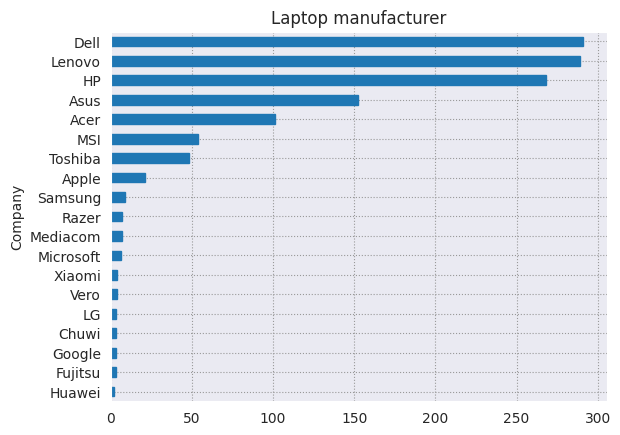

In [23]:
company = df['Company'].value_counts()

sns.set_style('darkgrid', {"grid.color": "0.6", "grid.linestyle": ":"})
company = company.sort_values(ascending=True)
company.plot(kind='barh', edgecolor='#1F77B4', title='Laptop manufacturer')
pd.DataFrame(company.sort_values(ascending=False))

## *2. TypeName*

,count
TypeName,
Notebook,707
Gaming,205
Ultrabook,194
2 in 1 Convertible,117
Workstation,29
Netbook,23


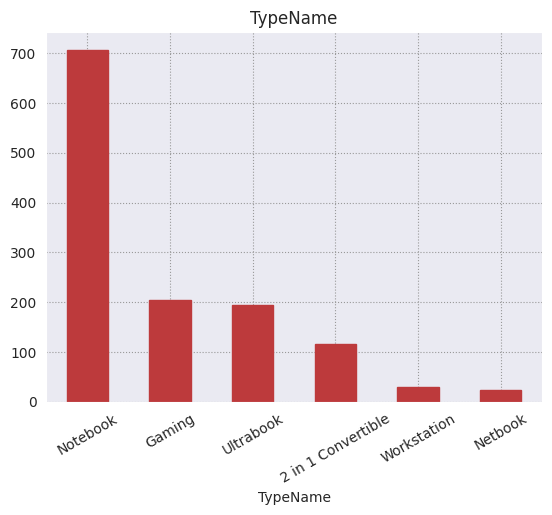

In [24]:
TypeName = df['TypeName'].value_counts()

sns.set_style('darkgrid', {"grid.color": "0.6", "grid.linestyle": ":"})
TypeName.plot(kind='bar', color='#BD3A3C', edgecolor='#BD3A3C', title='TypeName')
plt.xticks(rotation=30)
pd.DataFrame(TypeName)

## *3. Inches*

,count
Inches,
15.6,647
14.0,193
17.3,164
13.3,160
12.5,39
11.6,31
12.0,6
13.5,6
13.9,6


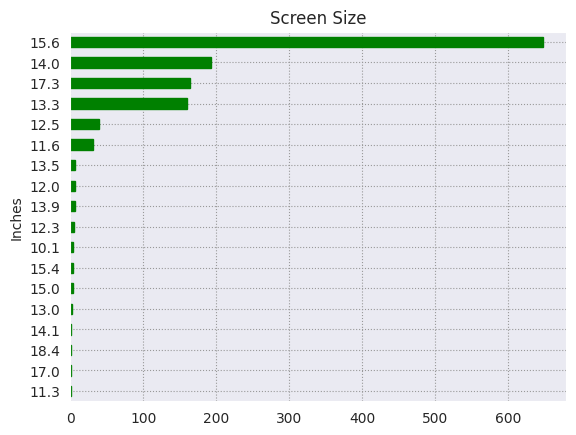

In [25]:
Inches = df['Inches'].value_counts()

sns.set_style('darkgrid', {"grid.color": "0.6", "grid.linestyle": ":"})
Inches = Inches.sort_values(ascending=True)
Inches.plot(kind='barh', color='green', edgecolor='green', title='Screen Size')
pd.DataFrame(Inches.sort_values(ascending=False))

## *4. ScreenResolution*

,count
Screen,
Full HD,835
Standard,369
4K Ultra HD,43
Quad HD+,28


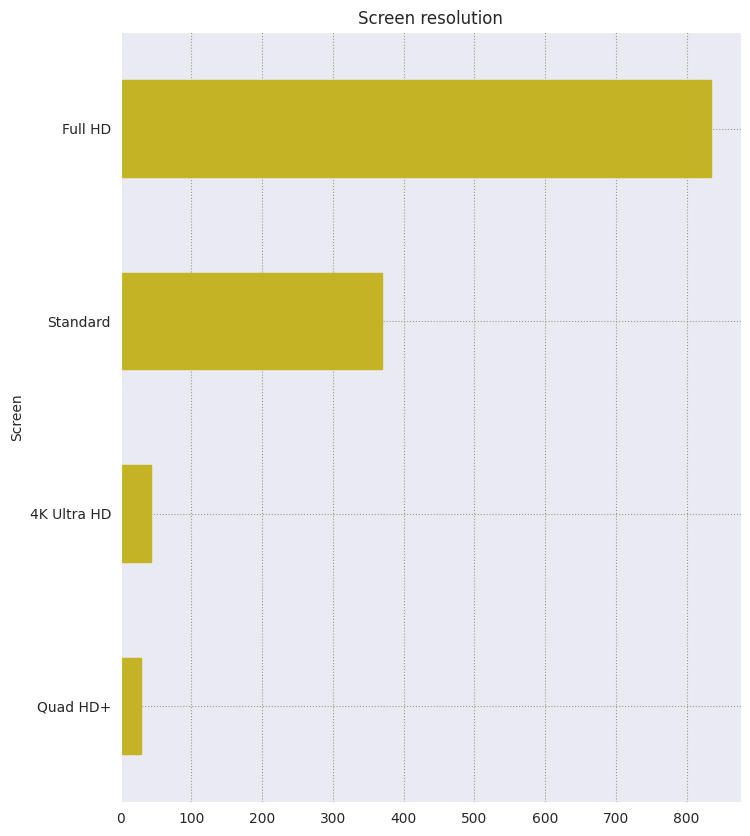

In [26]:
resolution = df['Screen'].value_counts()

plt.figure(figsize=(8,10))
sns.set_style('darkgrid', {"grid.color": "0.6", "grid.linestyle": ":"})
resolution = resolution.sort_values(ascending=True)
resolution.plot(kind='barh', color='#C4B324', edgecolor='#C4B324', title='Screen resolution')
pd.DataFrame(resolution.sort_values(ascending=False))

## *5. CPU_Company*

,count
CPU_company,
Intel,1214
AMD,60
Samsung,1


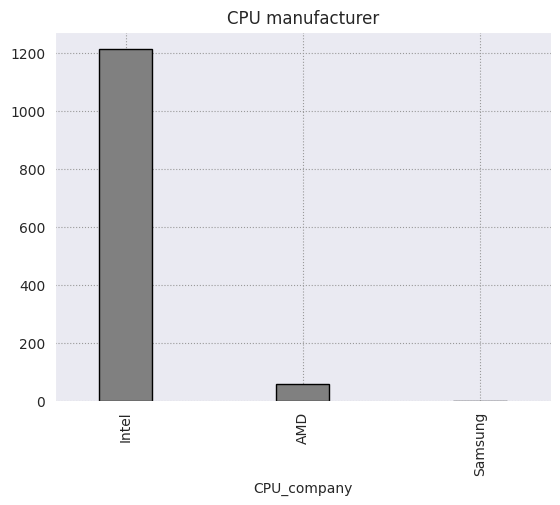

In [27]:
CPU_company = df['CPU_company'].value_counts()

CPU_company.plot(kind='bar', color='gray', edgecolor='black', width=0.3, title='CPU manufacturer')
pd.DataFrame(CPU_company)

## *6. Memory*

,count
PrimaryStorage,
256,508
1024,240
128,175
512,136
500,124
32,43
2048,16
64,15
16,10


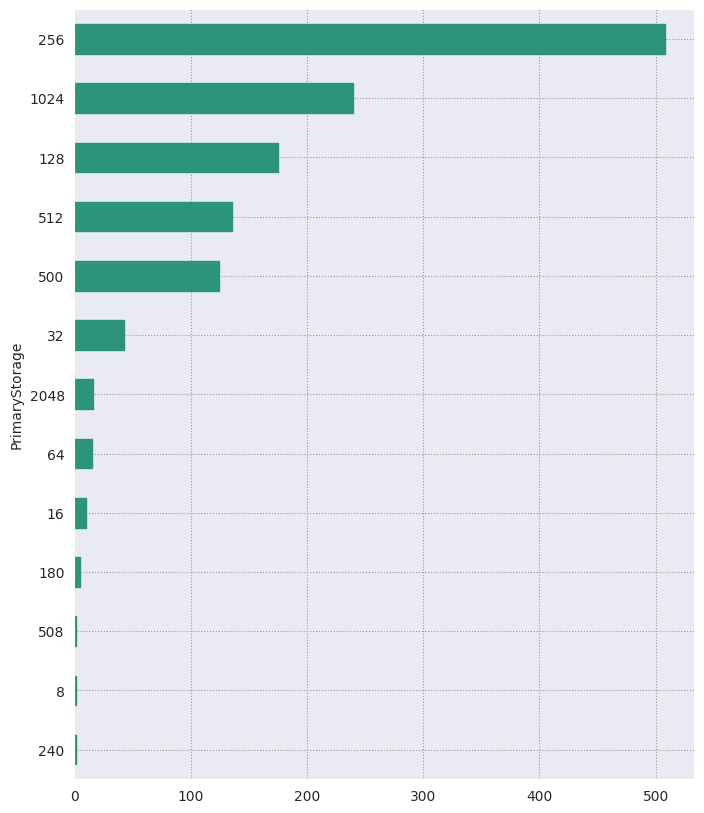

In [28]:
memory = df['PrimaryStorage'].value_counts()

plt.figure(figsize=(8,10))
sns.set_style('darkgrid', {"grid.color": "0.6", "grid.linestyle": ":"})
memory = memory.sort_values(ascending=True)
memory.plot(kind='barh', color='#2B9479', edgecolor='#2B9479')
pd.DataFrame(memory.sort_values(ascending=False))

## *7. GPU_Company*

,count
GPU_company,
Intel,704
Nvidia,396
AMD,174
ARM,1


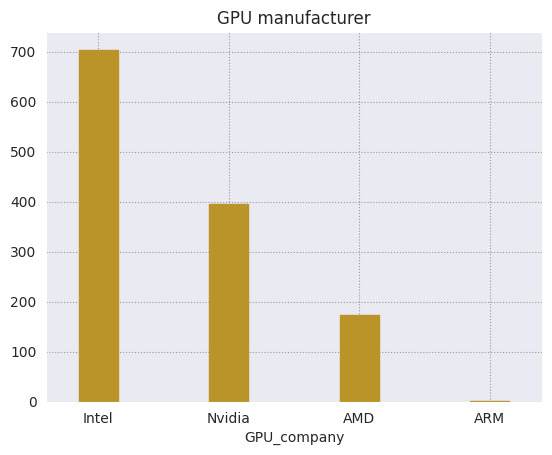

In [29]:
GPU_Company = df['GPU_company'].value_counts()

GPU_Company.plot(kind='bar', color='#BA9329', edgecolor='#BA9329', width=0.3, title='GPU manufacturer')
plt.xticks(rotation=0)
pd.DataFrame(GPU_Company)

## *8. OpSys*

,count
OS,
Windows 10,1048
No OS,66
Linux,58
Windows 7,45
Chrome OS,27
macOS,13
Mac OS X,8
Windows 10 S,8
Android,2


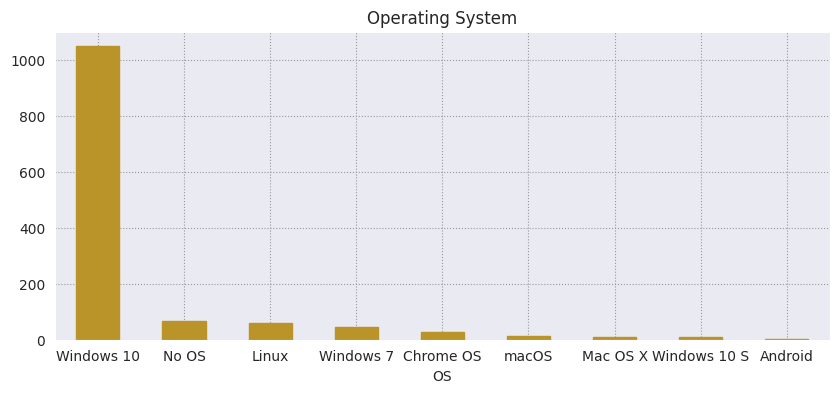

In [30]:
OpSys = df['OS'].value_counts()

plt.figure(figsize=(10,4))
OpSys.plot(kind='bar', color='#BA9329', edgecolor='#BA9329', title='Operating System')
plt.xticks(rotation=0)
pd.DataFrame(OpSys)

In [31]:
df.loc[df['OS']=="No OS"]

,Company,Product,TypeName,Inches,Ram,OS,Weight,Price_euros,Screen,ScreenW,...,RetinaDisplay,CPU_company,CPU_freq,CPU_model,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company,GPU_model
2,HP,250 G6,Notebook,15.6,8,No OS,1.86,575.00,Full HD,1920,...,No,Intel,2.5,Core i5 7200U,256,0,SSD,No,Intel,HD Graphics 620
10,HP,250 G6,Notebook,15.6,4,No OS,1.86,393.90,Standard,1366,...,No,Intel,2.5,Core i5 7200U,500,0,HDD,No,Intel,HD Graphics 620
11,HP,250 G6,Notebook,15.6,4,No OS,1.86,344.99,Full HD,1920,...,No,Intel,2.0,Core i3 6006U,500,0,HDD,No,Intel,HD Graphics 520
18,Lenovo,IdeaPad 320-15IKB,Notebook,15.6,8,No OS,2.20,499.00,Full HD,1920,...,No,Intel,2.4,Core i3 7100U,1024,0,HDD,No,Nvidia,GeForce 940MX
22,HP,255 G6,Notebook,15.6,4,No OS,1.86,258.00,Standard,1366,...,No,AMD,1.5,E-Series E2-9000e,500,0,HDD,No,AMD,Radeon R2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1174,Lenovo,IdeaPad 510-15IKB,Notebook,15.6,8,No OS,2.20,709.00,Full HD,1920,...,No,Intel,2.7,Core i7 7500U,1024,0,HDD,No,Nvidia,GeForce 940MX
1196,Lenovo,V110-15ISK (i3-6006U/4GB/1TB/Radeon,Notebook,15.6,4,No OS,1.90,368.00,Standard,1366,...,No,Intel,2.0,Core i3 6006U,1024,0,HDD,No,AMD,Radeon R5 M430
1201,Lenovo,IdeaPad 310-15ISK,Notebook,15.6,8,No OS,2.20,629.00,Standard,1366,...,No,Intel,2.5,Core i7 6500U,500,0,HDD,No,Nvidia,GeForce 920MX
1217,Lenovo,IdeaPad 320-17IKB,Notebook,17.3,8,No OS,2.80,539.00,Standard,1600,...,No,Intel,2.5,Core i5 7200U,1024,0,HDD,No,Intel,HD Graphics 620


In [32]:
df.loc[df['OS'] == "No OS", 'OS'] = "Window 10"

,count
OS,
Windows 10,1048
Window 10,66
Linux,58
Windows 7,45
Chrome OS,27
macOS,13
Mac OS X,8
Windows 10 S,8
Android,2


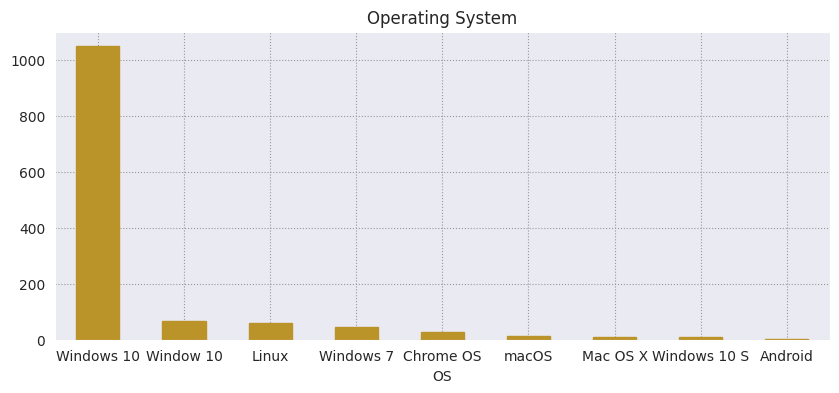

In [33]:
OpSys = df['OS'].value_counts()

plt.figure(figsize=(10,4))
OpSys.plot(kind='bar', color='#BA9329', edgecolor='#BA9329', title='Operating System')
plt.xticks(rotation=0)
pd.DataFrame(OpSys)

## *9. CPU_Frequency*

,count
CPU_freq,
2.50,285
2.80,165
2.70,164
1.60,124
2.30,86
2.00,86
1.80,78
2.60,74
1.10,53


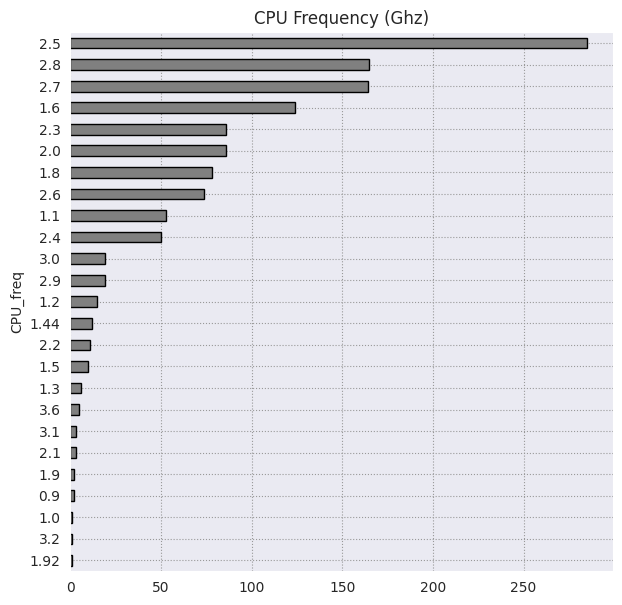

In [34]:
freq = df['CPU_freq'].value_counts()

plt.figure(figsize=(7,7))
sns.set_style('darkgrid', {"grid.color": "0.6", "grid.linestyle": ":"})
freq = freq.sort_values(ascending=True)
freq.plot(kind='barh', color='gray', edgecolor='black', title='CPU Frequency (Ghz)')
pd.DataFrame(freq.sort_values(ascending=False))

## *10. RAM*

,count
Ram,
8,613
4,367
16,198
6,35
12,25
32,17
2,16
24,3
64,1


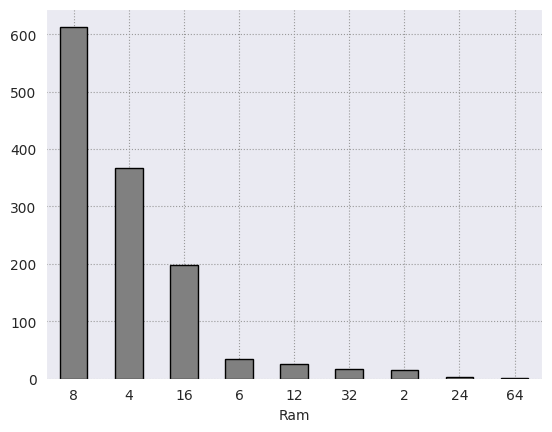

In [35]:
RAM = df['Ram'].value_counts()

sns.set_style('darkgrid', {"grid.color": "0.6", "grid.linestyle": ":"})
RAM.plot(kind='bar', color='gray', edgecolor='black')
plt.xticks(rotation=0)
pd.DataFrame(RAM)

## *11. Weight (kg)*

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


,Weight
count,1275.000000
mean,2.040525
std,0.669196
min,0.690000
25%,1.500000
50%,2.040000
75%,2.310000
max,4.700000


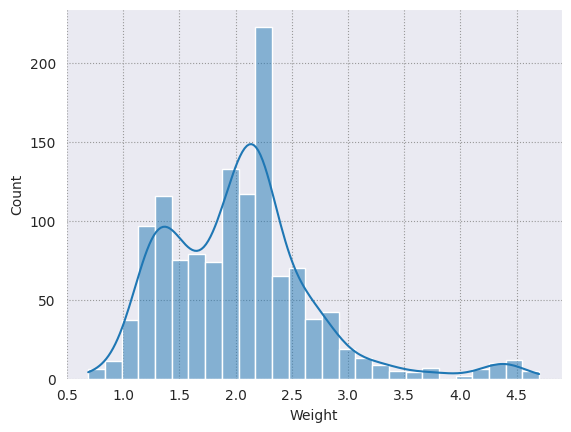

In [36]:
weight = df['Weight']

#plt.figure(figsize=(10,4))
sns.histplot(weight, kde=True)
plt.xticks(rotation=0)
pd.DataFrame(weight.describe())

## *12. Price (Euro)*

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


,Price_euros
count,1275.000000
mean,1134.969059
std,700.752504
min,174.000000
25%,609.000000
50%,989.000000
75%,1496.500000
max,6099.000000


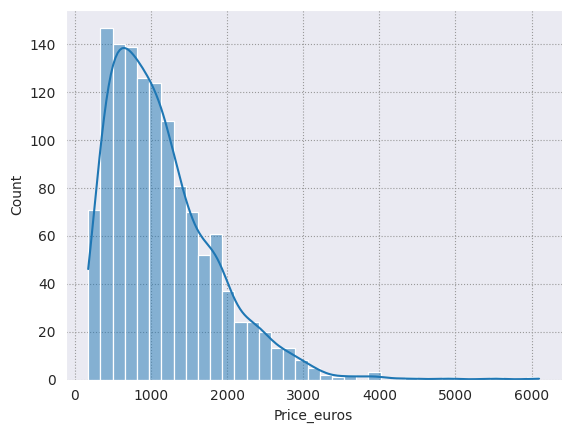

In [37]:
price = df['Price_euros']

#plt.figure(figsize=(10,4))
sns.histplot(price, kde=True)
plt.xticks(rotation=0)
pd.DataFrame(price.describe())

In [38]:
df[df['Price_euros'] == 174]

,Company,Product,TypeName,Inches,Ram,OS,Weight,Price_euros,Screen,ScreenW,...,RetinaDisplay,CPU_company,CPU_freq,CPU_model,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company,GPU_model
1215,Acer,C740-C9QX (3205U/2GB/32GB/Chrome,Netbook,11.6,2,Chrome OS,1.3,174.0,Standard,1366,...,No,Intel,1.5,Celeron Dual Core 3205U,32,0,SSD,No,Intel,HD Graphics


## *13. ScreenW*

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


,ScreenW
count,1275.000000
mean,1900.043922
std,493.346186
min,1366.000000
25%,1920.000000
50%,1920.000000
75%,1920.000000
max,3840.000000


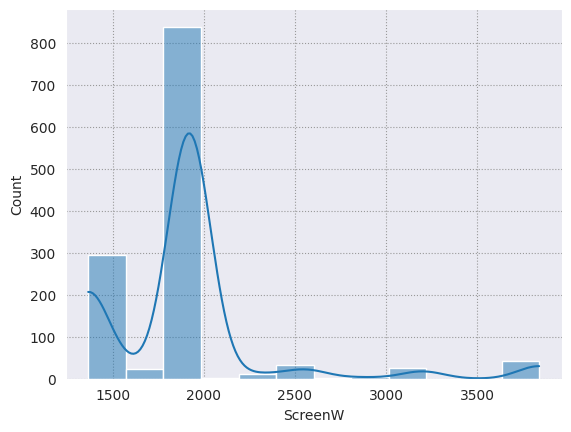

In [39]:
screenW = df['ScreenW']

#plt.figure(figsize=(10,4))
sns.histplot(screenW, kde=True)
plt.xticks(rotation=0)
pd.DataFrame(screenW.describe())

## *14. ScreenH*

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


,ScreenH
count,1275.000000
mean,1073.904314
std,283.883940
min,768.000000
25%,1080.000000
50%,1080.000000
75%,1080.000000
max,2160.000000


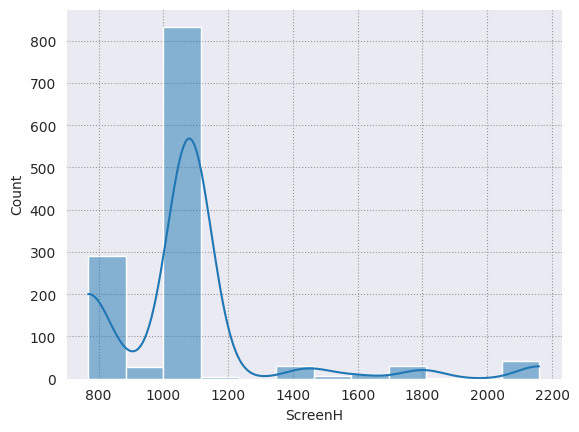

In [40]:
screenH = df['ScreenH']

#plt.figure(figsize=(10,4))
sns.histplot(screenH, kde=True)
plt.xticks(rotation=0)
pd.DataFrame(screenH.describe())

## 15. Aspect Ratio

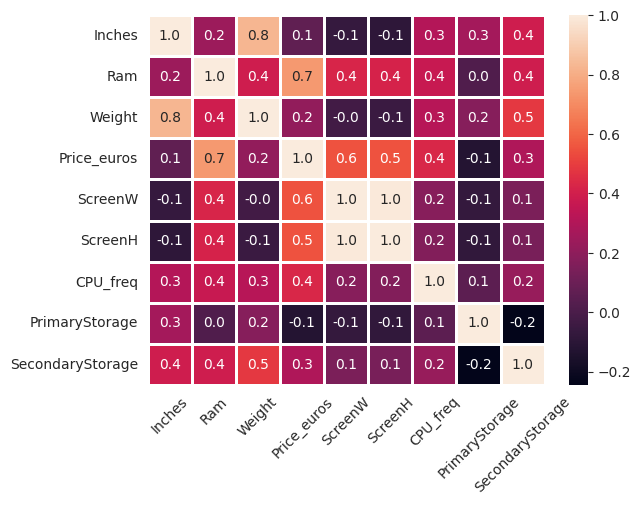

In [41]:
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt='.1f', linewidths=2)
plt.xticks(rotation=45)
plt.show()

In [42]:
df['AspectRatio']=df['ScreenW']/df['ScreenH']

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


,AspectRatio
count,1275.000000
mean,1.771657
std,0.037017
min,1.500000
25%,1.777778
50%,1.777778
75%,1.777778
max,1.778646


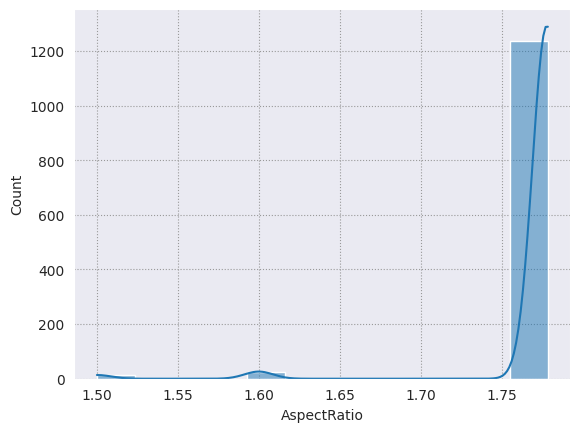

In [43]:
AspectRatio = df['AspectRatio']

#plt.figure(figsize=(10,4))
sns.histplot(AspectRatio, kde=True)
plt.xticks(rotation=0)
pd.DataFrame(AspectRatio.describe())

In [44]:
# Chia theo khoảng cố định
df['AspectRatio'] = pd.cut(df['AspectRatio'], 
    bins=[0, 1.33, 1.6, 1.78, 2.0, np.inf], 
    labels=['4:3', '16:10', '16:9', '21:9', 'Khác'])

In [45]:
# In ra tổng các giá trị của mỗi nhãn
grouped_totals = df['AspectRatio'].value_counts()
print("Tổng giá trị theo từng nhóm AspectRatio:")
print(grouped_totals)


Tổng giá trị theo từng nhóm AspectRatio:
AspectRatio
16:9     1237
16:10      38
4:3         0
21:9        0
Khác        0
Name: count, dtype: int64


# **6. Collective data analysis:**

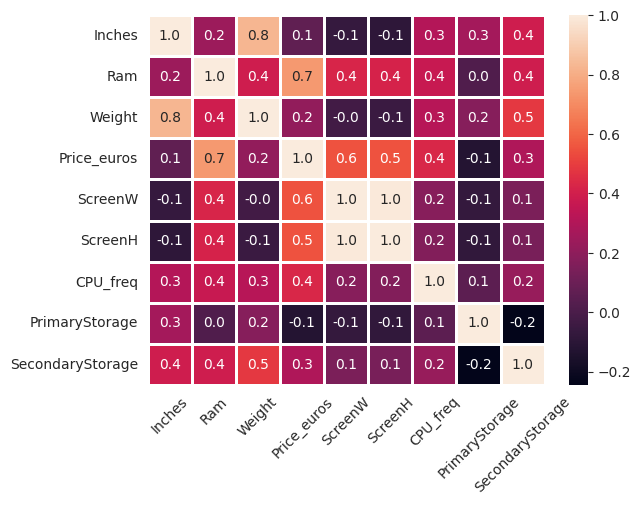

In [46]:
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt='.1f', linewidths=2)
plt.xticks(rotation=45)
plt.show()

## *1. Company & Price (Euro)*

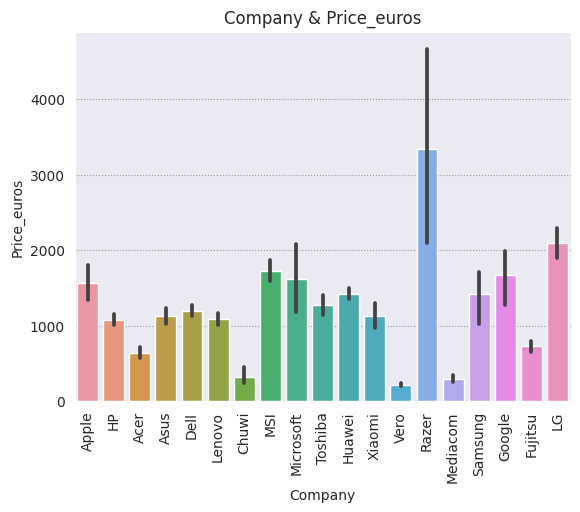

In [47]:
sns.barplot(x = df['Company'], y = df['Price_euros'])
plt.xticks(rotation='vertical')
plt.title('Company & Price_euros')
plt.show()

## *2. TypeName & Price (Euro)*

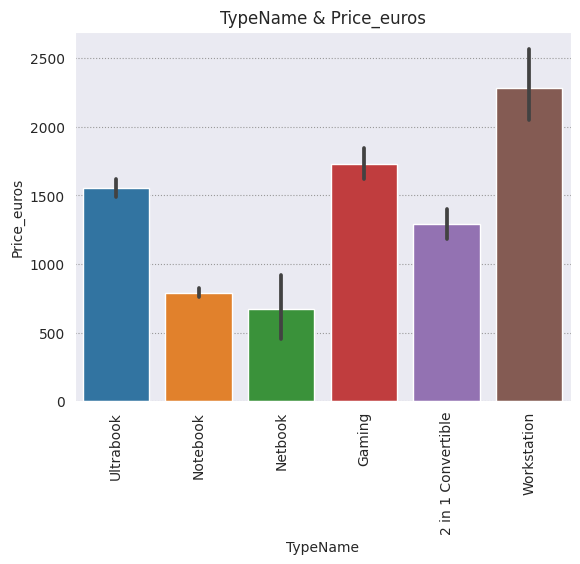

In [48]:
sns.barplot(x = df['TypeName'], y = df['Price_euros'])
plt.xticks(rotation='vertical')
plt.title('TypeName & Price_euros')
plt.show()

## *3. Inches & Price (Euro)*

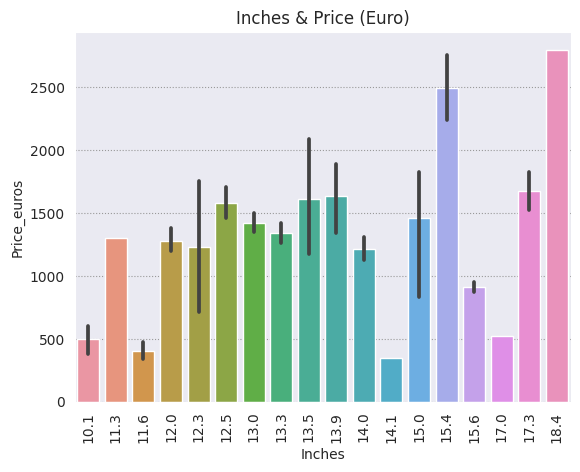

In [49]:
sns.barplot(x = df['Inches'], y = df['Price_euros'])
plt.xticks(rotation='vertical')
plt.title('Inches & Price (Euro)')
plt.show()

## *4. ScreenResolution & Price (Euro)*

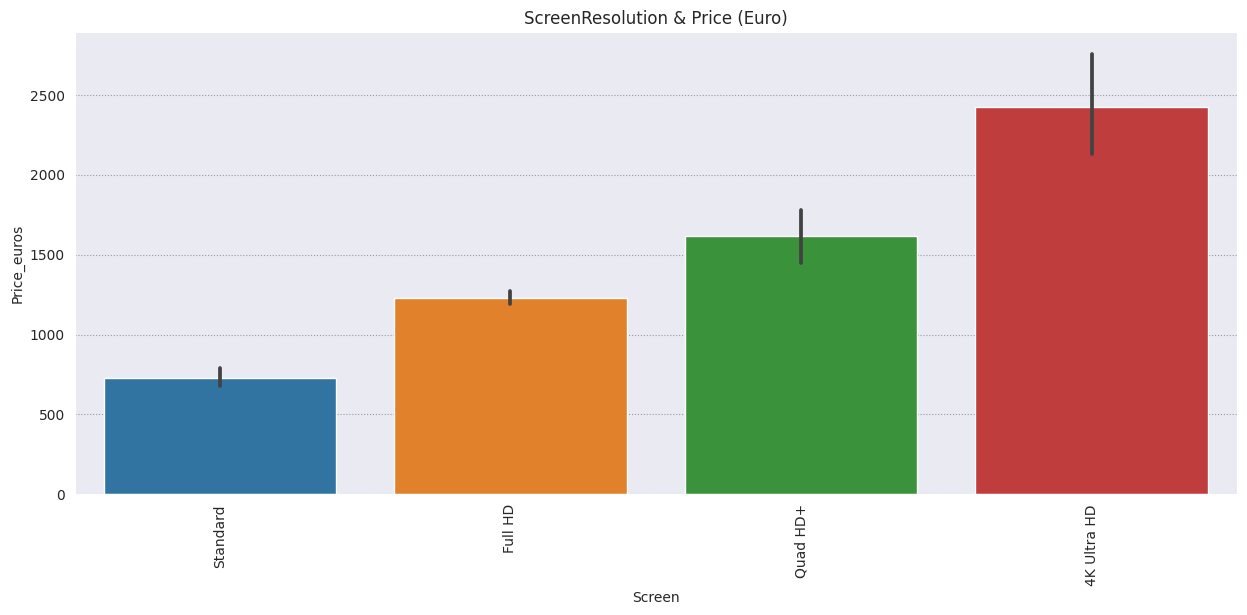

In [50]:
plt.figure(figsize=(15,6))

sns.barplot(x = df['Screen'], y = df['Price_euros'])
plt.xticks(rotation='vertical')
plt.title('ScreenResolution & Price (Euro)')
plt.show()

## *5. CPU & Price (Euro)*

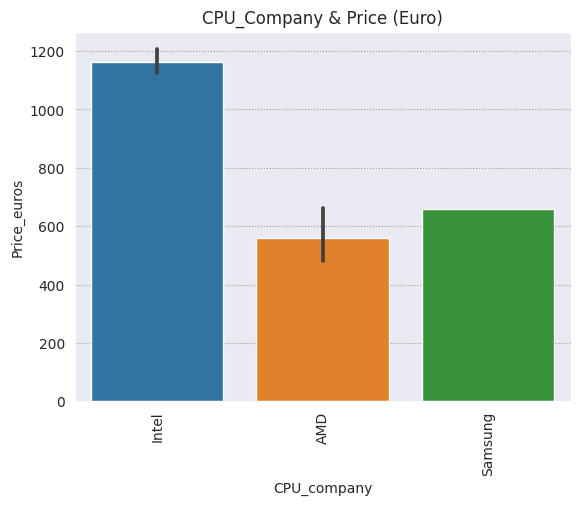

In [51]:
sns.barplot(x = df['CPU_company'], y = df['Price_euros'])
plt.xticks(rotation='vertical')
plt.title('CPU_Company & Price (Euro)')
plt.show()

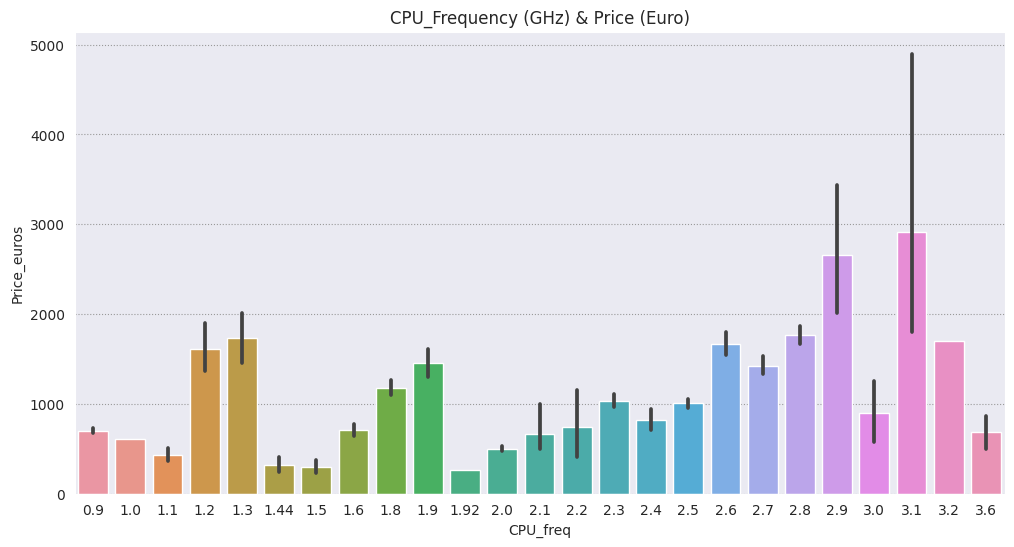

In [52]:
plt.figure(figsize=(12,6))

sns.barplot(x = df['CPU_freq'], y = df['Price_euros'])
plt.xticks(rotation=0)
plt.title('CPU_Frequency (GHz) & Price (Euro)')
plt.show()

## *6. RAM (GB) & Price (Euro)*

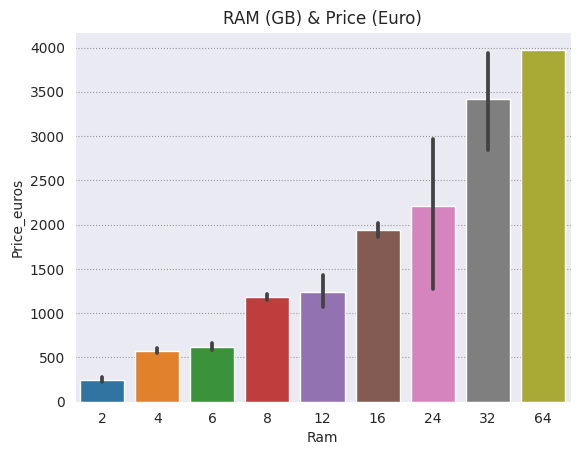

In [53]:
sns.barplot(x = df['Ram'], y = df['Price_euros'])
plt.xticks(rotation=0)
plt.title('RAM (GB) & Price (Euro)')
plt.show()

## *7. Memory & Price (Euro)*

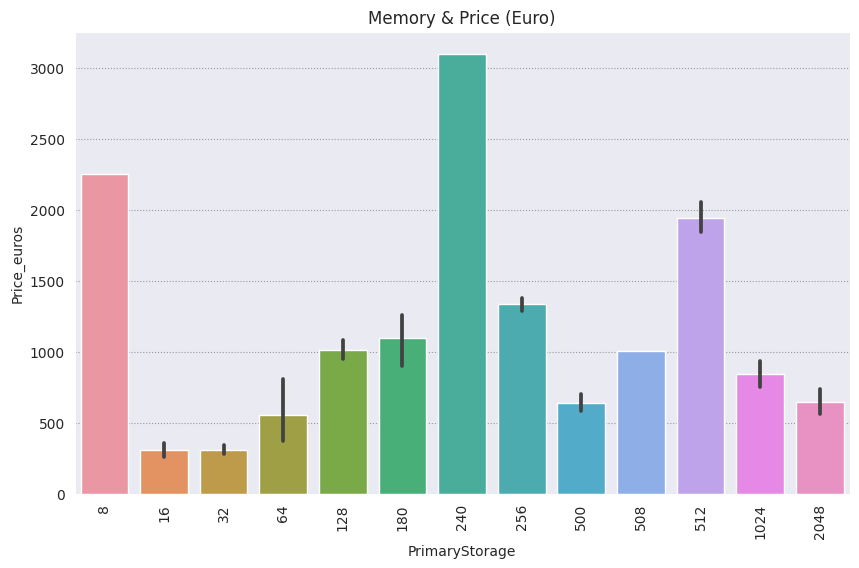

In [54]:
plt.figure(figsize=(10,6))

sns.barplot(x = df['PrimaryStorage'], y = df['Price_euros'])
plt.xticks(rotation='vertical')
plt.title('Memory & Price (Euro)')
plt.show()

## *8. GPU & Price (Euro)*

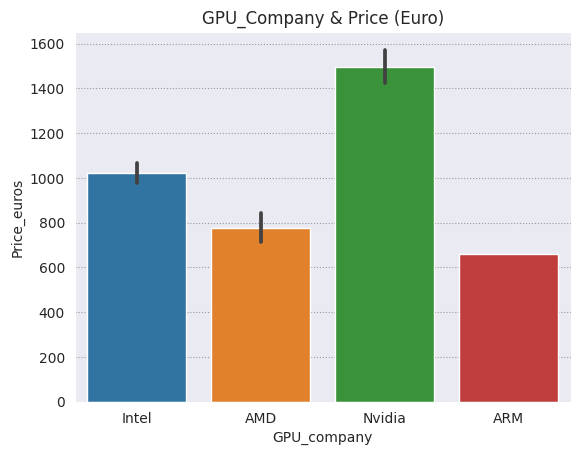

In [55]:
sns.barplot(x = df['GPU_company'], y = df['Price_euros'])
plt.xticks(rotation=0)
plt.title('GPU_Company & Price (Euro)')
plt.show()

## *9. OpSys & Price (Euro)*

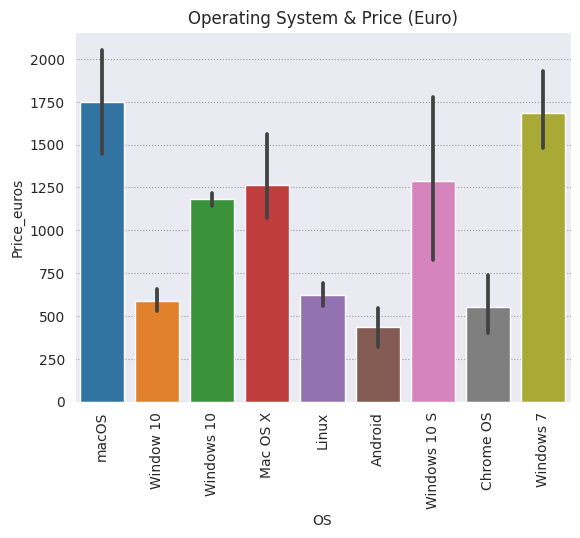

In [56]:
sns.barplot(x = df['OS'], y = df['Price_euros'])
plt.xticks(rotation='vertical')
plt.title('Operating System & Price (Euro)')
plt.show()

---

**Phat hien outliers**

In [57]:
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

In [58]:
outliers_ram = detect_outliers(df, 'Ram')
outliers_ram.head()

,Company,Product,TypeName,Inches,Ram,OS,Weight,Price_euros,Screen,ScreenW,...,CPU_company,CPU_freq,CPU_model,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company,GPU_model,AspectRatio
3,Apple,MacBook Pro,Ultrabook,15.4,16,macOS,1.83,2537.45,Standard,2880,...,Intel,2.7,Core i7,512,0,SSD,No,AMD,Radeon Pro 455,16:10
6,Apple,MacBook Pro,Ultrabook,15.4,16,Mac OS X,2.04,2139.97,Standard,2880,...,Intel,2.2,Core i7,256,0,Flash Storage,No,Intel,Iris Pro Graphics,16:10
8,Asus,ZenBook UX430UN,Ultrabook,14.0,16,Windows 10,1.30,1495.00,Full HD,1920,...,Intel,1.8,Core i7 8550U,512,0,SSD,No,Nvidia,GeForce MX150,16:9
12,Apple,MacBook Pro,Ultrabook,15.4,16,macOS,1.83,2439.97,Standard,2880,...,Intel,2.8,Core i7,256,0,SSD,No,AMD,Radeon Pro 555,16:10
17,Apple,MacBook Pro,Ultrabook,15.4,16,macOS,1.83,2858.00,Standard,2880,...,Intel,2.9,Core i7,512,0,SSD,No,AMD,Radeon Pro 560,16:10


In [59]:
outliers_weight = detect_outliers(df, 'Weight')
outliers_weight.head()

,Company,Product,TypeName,Inches,Ram,OS,Weight,Price_euros,Screen,ScreenW,...,CPU_company,CPU_freq,CPU_model,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company,GPU_model,AspectRatio
177,MSI,GT80S 6QF-074US,Gaming,18.4,32,Windows 10,4.40,2799.00,Full HD,1920,...,Intel,2.9,Core i7 6920HQ,512,1024,SSD,HDD,Nvidia,GTX 980 SLI,16:9
224,Dell,Alienware 17,Gaming,17.3,16,Windows 10,4.42,2456.34,Full HD,1920,...,Intel,2.8,Core i7 7700HQ,256,1024,SSD,HDD,Nvidia,GeForce GTX 1060,16:9
238,Asus,ROG G703VI-E5062T,Gaming,17.3,32,Windows 10,4.70,3890.00,Full HD,1920,...,Intel,2.9,Core i7 7820HK,512,1024,SSD,HDD,Nvidia,GeForce GTX 1080,16:9
247,Asus,Rog G701VIK-BA060T,Gaming,17.3,16,Windows 10,3.60,2999.00,Full HD,1920,...,Intel,2.9,Core i7 7820HK,256,0,SSD,No,Nvidia,GeForce GTX 1080,16:9
251,Asus,ROG G752VSK-GC493T,Gaming,17.3,16,Windows 10,4.30,1799.00,Full HD,1920,...,Intel,2.8,Core i7 7700HQ,256,1024,SSD,HDD,Nvidia,GeForce GTX 980M,16:9


In [60]:
outliers_price = detect_outliers(df, 'Price_euros')
outliers_price.head()

,Company,Product,TypeName,Inches,Ram,OS,Weight,Price_euros,Screen,ScreenW,...,CPU_company,CPU_freq,CPU_model,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company,GPU_model,AspectRatio
17,Apple,MacBook Pro,Ultrabook,15.4,16,macOS,1.83,2858.0,Standard,2880,...,Intel,2.9,Core i7,512,0,SSD,No,AMD,Radeon Pro 560,16:10
196,Razer,Blade Pro,Gaming,17.3,32,Windows 10,3.49,6099.0,4K Ultra HD,3840,...,Intel,2.9,Core i7 7820HK,1024,0,SSD,No,Nvidia,GeForce GTX 1080,16:9
204,Dell,Precision 7520,Workstation,15.6,16,Windows 10,2.80,3055.0,4K Ultra HD,3840,...,Intel,3.0,Xeon E3-1505M V6,256,1024,SSD,HDD,Nvidia,Quadro M1200,16:9
238,Asus,ROG G703VI-E5062T,Gaming,17.3,32,Windows 10,4.70,3890.0,Full HD,1920,...,Intel,2.9,Core i7 7820HK,512,1024,SSD,HDD,Nvidia,GeForce GTX 1080,16:9
247,Asus,Rog G701VIK-BA060T,Gaming,17.3,16,Windows 10,3.60,2999.0,Full HD,1920,...,Intel,2.9,Core i7 7820HK,256,0,SSD,No,Nvidia,GeForce GTX 1080,16:9


# **7. Preprocessing:**

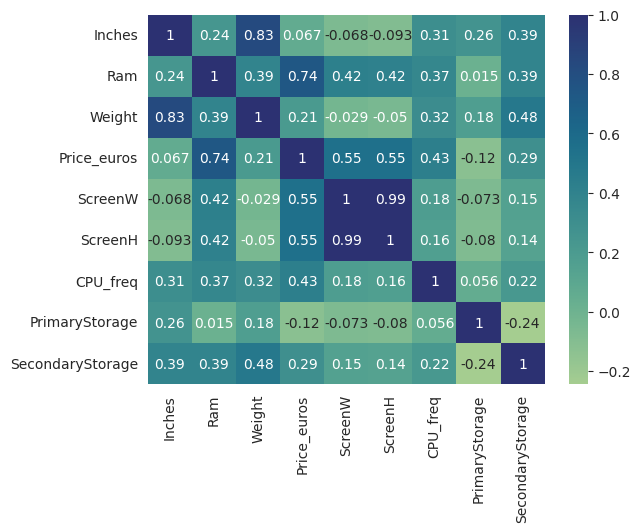

In [61]:
x = df.corr(numeric_only=True)

sns.heatmap(x, annot=True, cmap='crest')

plt.show()

In [62]:
df.sample()

,Company,Product,TypeName,Inches,Ram,OS,Weight,Price_euros,Screen,ScreenW,...,CPU_company,CPU_freq,CPU_model,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company,GPU_model,AspectRatio
63,Asus,UX410UA-GV350T (i5-8250U/8GB/256GB/FHD/W10),Notebook,14.0,8,Windows 10,1.4,941.0,Full HD,1920,...,Intel,1.6,Core i5 8250U,256,0,SSD,No,Intel,UHD Graphics 620,16:9


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Company               1275 non-null   object  
 1   Product               1275 non-null   object  
 2   TypeName              1275 non-null   object  
 3   Inches                1275 non-null   float64 
 4   Ram                   1275 non-null   int64   
 5   OS                    1275 non-null   object  
 6   Weight                1275 non-null   float64 
 7   Price_euros           1275 non-null   float64 
 8   Screen                1275 non-null   object  
 9   ScreenW               1275 non-null   int64   
 10  ScreenH               1275 non-null   int64   
 11  Touchscreen           1275 non-null   object  
 12  IPSpanel              1275 non-null   object  
 13  RetinaDisplay         1275 non-null   object  
 14  CPU_company           1275 non-null   object  
 15  CPU_

### ***1- encoding***

In [64]:
X_cat=['Company','Product','TypeName','OS','Screen','Touchscreen','IPSpanel','RetinaDisplay','CPU_company','CPU_model','PrimaryStorageType','SecondaryStorageType','GPU_company','GPU_model','AspectRatio']
X_num=['Inches','Ram','Weight','ScreenW','ScreenH','CPU_freq','PrimaryStorage','SecondaryStorage']
Y=df['Price_euros']

In [65]:
X = df.copy()
X.drop(columns =["Price_euros"],inplace =True)
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Company               1275 non-null   object  
 1   Product               1275 non-null   object  
 2   TypeName              1275 non-null   object  
 3   Inches                1275 non-null   float64 
 4   Ram                   1275 non-null   int64   
 5   OS                    1275 non-null   object  
 6   Weight                1275 non-null   float64 
 7   Screen                1275 non-null   object  
 8   ScreenW               1275 non-null   int64   
 9   ScreenH               1275 non-null   int64   
 10  Touchscreen           1275 non-null   object  
 11  IPSpanel              1275 non-null   object  
 12  RetinaDisplay         1275 non-null   object  
 13  CPU_company           1275 non-null   object  
 14  CPU_freq              1275 non-null   float64 
 15  CPU_

In [66]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer


num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy ="median")),
     ('std_scaler',StandardScaler()),
])

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, X_num),
    ("cat", OneHotEncoder(), X_cat),
])

X_prepared = full_pipeline.fit_transform(X)

# **8. Train & Test (split):**

In [67]:
x_train, x_test, y_train, y_test = train_test_split(X_prepared, Y, test_size=0.2, shuffle=True, random_state=42)

# **9. ML Model:**

### ***1) LinearRegression***

In [68]:
model_1 = LinearRegression()
model_1.fit(x_train,y_train)

LinearRegression()

In [84]:
y_pred = model_1.predict(x_test)
print(f'Squared error: {mean_squared_error(y_test, y_pred)}')

Squared error: 75894.44359692713


### ***2) SGDRegressor***

In [72]:
model_2 = SGDRegressor()
model_2.fit(x_train,y_train)

SGDRegressor()

In [73]:
y_pred = model_2.predict(x_test)
print(f'Squared error: {mean_squared_error(y_test, y_pred)}')

Squared error: 5961598.487365804%


### ***3) Lasso***

In [74]:
model_3 = Lasso()
model_3.fit(x_train,y_train)

Lasso()

In [85]:
y_pred = model_3.predict(x_test)
print(f'Squared error: {mean_squared_error(y_test, y_pred).mean()}')

Squared error: 67206.99055594606


### ***4) ElasticNet***

In [78]:
model_5 = ElasticNet()
model_5.fit(x_train,y_train)

ElasticNet()

In [79]:
y_pred = model_5.predict(x_test)
print(f'Squared error: {mean_squared_error(y_test, y_pred)}')

Squared error: 15879430.948310543%


---

## ***- Train & Test (score):***

In [80]:
# List of models
models = [model_1, model_2, model_3, model_5]
model_names = ['LinearRegression', 'SGDRegressor', 'Lasso', 'ElasticNet']

# Calculate train and test scores
train_scores = [f'{round(model.score(x_train, y_train), 2) * 100} %' for model in models]
test_scores = [f'{round(model.score(x_test, y_test), 2) * 100} %' for model in models]

# Create DataFrame
df = pd.DataFrame({
    'Model': model_names,
    'Train score': train_scores,
    'Test score': test_scores,
})

df

,Model,Train score,Test score
0,LinearRegression,98.0 %,85.0 %
1,SGDRegressor,93.0 %,88.0 %
2,Lasso,88.0 %,86.0 %
3,ElasticNet,69.0 %,68.0 %


## ***- Cross validation:***

In [81]:
from sklearn.model_selection import cross_val_score

lnr = LinearRegression()

scores = cross_val_score(lnr, X_prepared, Y, cv=5, scoring="neg_mean_squared_error")
rmse_scores = np.sqrt(-scores)

In [82]:
def display_scores(scores):
    print("Scores: ", scores)
    print("Mean: ", scores.mean())
    print("Standard deviation: ", scores.std())
display_scores(rmse_scores)

Scores:  [233.69056663 329.46737742 383.98579702 320.95605875 530.083775  ]
Mean:  359.6367149633029
Standard deviation:  97.89166710717849
